In [243]:
import numpy as np
import pandas as pd
import glob

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm

import bokeh
import bokeh.plotting
from bokeh.plotting import ColumnDataSource
from bokeh.models import LabelSet
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [244]:
#Glob together all csvs with the deeplabcut generated position data. 
#The deeplabcut data lists the network iteration of the trained network at the end of the filename
#This value will always be a multiple of 1000
file_list=glob.glob('.\\*\\*000.csv')
well_list=glob.glob('.\\*\\*Positions.csv')

In [245]:
file_list[:10]

['.\\190919\\190919_DCHC_transfer_experiment_S_well_1DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_2DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_3DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_4DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_5DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_6DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_7DeepCut_resnet50_DCHC_transfer_analysis_20190919_SOct2shuffle1_80000.csv',
 '.\\190919\\190919_DCHC_transfer_experiment_S_well_8DeepCut_resnet50_DCHC_transfer_analysis_20190919_SO

In [246]:
well_list

['.\\Well_positions\\190919_DCHC_transfer_experiment_S_Well_Positions.csv']

In [247]:
for i,name in tqdm(enumerate(well_list)):
    #load each csv as a dataframe and append to the end of one large dataframe
    if i == 0:
        well_df=pd.read_csv(name,comment='#')
    else:
        well_df.append(pd.read_csv(name,comment='#'))

1it [00:00, 142.77it/s]


In [248]:
well_df.head()

,,X,Y,WellNum,Date
0,1,533,271,1,190919
1,2,368,551,1,190919
2,3,215,275,1,190919
3,4,530,272,2,190919
4,5,367,551,2,190919


In [249]:
#create dataframe for metadata
metadata=pd.DataFrame(columns=['well number','species','collection date','file path'])
#list to contain all position dataframes
df_list=[]
for i,name in tqdm(enumerate(file_list)):
    #load each csv as a dataframe into a list
    df_list.append(pd.read_csv(name,header=[1,2]))
    
    #pull metadata out of the filenames (Species identifier, collection date, well number)
    metadata = metadata.append({'species':name[name.rfind('_',0,name.rfind('_'))+1], 
                        'collection date':name[name.find('\\')+1:name.find('\\')+7],
                        'well number':name[name.find('well')+5:name.find('well')+6],
                        'file path' : name}, 
                     ignore_index=True)

#creating columns for the ant length information
metadata['length lower']=''
metadata['length upper']=''

109it [00:20,  5.93it/s]


In [250]:
#loop through the each dataframe and create a new column named antlength
#antlength is the length of the ant calculated from the head and gaster position data
for i,df in tqdm(enumerate(df_list)):
    df['antlength'] = np.sqrt((df['anthead']['x'] - df['antgaster']['x'])**2 + 
                           (df['anthead']['y'] - df['antgaster']['y'])**2)

109it [00:01, 82.11it/s]


In [251]:
#list all dates in the metadata file
np.unique(metadata['collection date'])

array(['190919', '191003', '191008', '191012', '191016', '191019',
       '191020', '191021', '191022', '191025', '191029', '191105',
       '191113', '191115'], dtype=object)

### In the next section the ant lengths from each experiment are plotted in order to determine an upper and lower bound for the length of the ant in each well

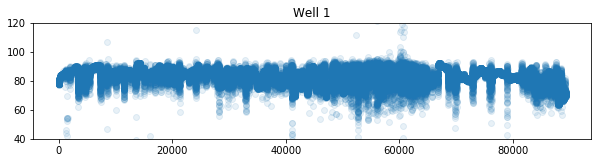

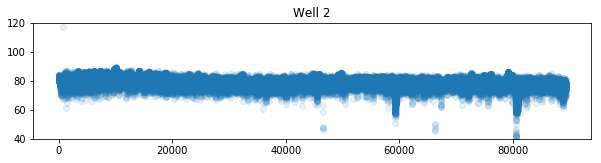

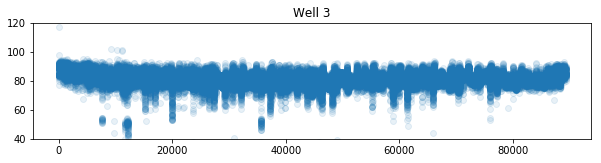

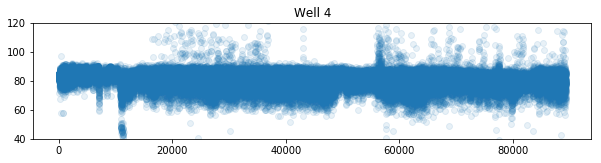

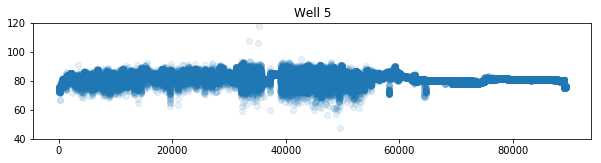

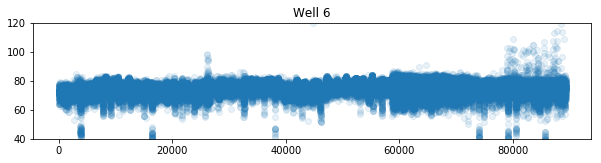

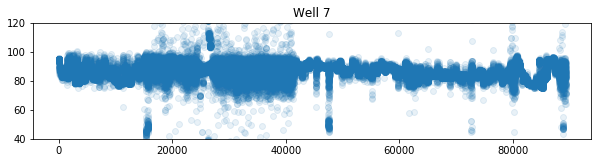

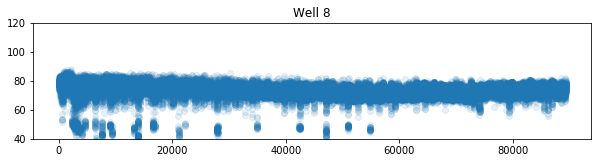

In [252]:
#count is used to specify the position of each subplot
count=0

#date specifies the date of the data collection to be analyzed
date='191105'

#loop through the indices of the rows from the ID dataframe. These indices should match
#up with the position of the corresponding dataframe in the dataframe list.
for i in metadata.loc[metadata['collection date']==date].index:
    df=df_list[i]
    subplt = int(str(len(metadata.loc[metadata['collection date']==date].index)) + '1' + str(count+1))
    plt.figure(figsize=(10,20))
    plt.subplot(subplt)
    plt.title('Well ' + metadata.iloc[i]['well number'])
    plt.scatter(df['bodyparts']['coords'],df['antlength'],alpha=0.1)
    plt.ylim([40,120])
    count = count+1

# Thought
Maybe don't need to have a lower bound. Isn't too big of an issue if either head or gaster is incorrectly labelled so long as it is closer to the other marker than what it should be

In [253]:
#metadata['length lower'].loc[metadata['collection date']=='190919'] = 40
metadata['length upper'].loc[metadata['collection date']=='190919'] = 120
#metadata['length lower'].loc[metadata['collection date']=='191003'] = 40
metadata['length upper'].loc[metadata['collection date']=='191003'] = 120
#metadata['length lower'].loc[metadata['collection date']=='191008'] = 30
metadata['length upper'].loc[metadata['collection date']=='191008'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191012'] = 30
metadata['length upper'].loc[metadata['collection date']=='191012'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191016'] = 30
metadata['length upper'].loc[metadata['collection date']=='191016'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191019'] = 30
metadata['length upper'].loc[metadata['collection date']=='191019'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191020'] = 30
metadata['length upper'].loc[metadata['collection date']=='191020'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191021'] = 30
metadata['length upper'].loc[metadata['collection date']=='191021'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191022'] = 30
metadata['length upper'].loc[metadata['collection date']=='191022'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191025'] = 30
metadata['length upper'].loc[metadata['collection date']=='191025'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191029'] = 45
metadata['length upper'].loc[metadata['collection date']=='191029'] = 125
#metadata['length lower'].loc[metadata['collection date']=='191105'] = 40
metadata['length upper'].loc[metadata['collection date']=='191105'] = 120
#metadata['length lower'].loc[metadata['collection date']=='191113'] = 30
metadata['length upper'].loc[metadata['collection date']=='191113'] = 110
#metadata['length lower'].loc[metadata['collection date']=='191115'] = 40
metadata['length upper'].loc[metadata['collection date']=='191115'] = 120

In [254]:
metadata.head()

,well number,species,collection date,file path,length lower,length upper
0,1,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,,120
1,2,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,,120
2,3,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,,120
3,4,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,,120
4,5,S,190919,.\190919\190919_DCHC_transfer_experiment_S_wel...,,120


In [256]:
for i,df in enumerate(df_list):
    #df['good frames'] = (df['antlength'] < metadata.iloc[i]['length upper']) & (df['antlength'] > metadata.iloc[i]['length lower'])  
    df['good frames'] = (df['antlength'] < metadata.iloc[i]['length upper'])  

In [257]:
for i,df in enumerate(df_list):
    avgLen = np.average(df['antlength'].loc[df['good frames']])
    df['touching'] = False

    df['head2head'] = np.sqrt((df['beetlehead']['x'] - df['anthead']['x'])**2 + 
                              (df['beetlehead']['y'] - df['anthead']['y'])**2)
        
    df['head2butt'] = np.sqrt((df['beetlehead']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetlehead']['y'] - df['antgaster']['y'])**2)
    
    if (metadata.iloc[i]['species'] == 'S') | (metadata.iloc[i]['species'] == 'D'):
        df['ellipse distance'] = df['head2head'] + df['head2butt']
        df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])&df['good frames']) | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))
        
    if metadata.iloc[i]['species'] == 'P':
        df['butt2head'] = np.sqrt((df['beetleabdomen']['x'] - df['anthead']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['anthead']['y'])**2)
        
        df['butt2butt'] = np.sqrt((df['beetleabdomen']['x'] - df['antgaster']['x'])**2 + 
                              (df['beetleabdomen']['y'] - df['antgaster']['y'])**2)
    
        headEllipse=df['head2head'] + df['head2butt']
        buttEllipse=df['butt2head'] + df['butt2butt']
    
        df['ellipse distance'] = headEllipse*(headEllipse<buttEllipse) + buttEllipse*(buttEllipse<headEllipse)
    
        df['touching'] = ((df['antlength']*1.4 > df['ellipse distance'])&df['good frames']) \
                            | ((df['head2head']<avgLen) | (df['head2butt']<avgLen))\
                            | ((df['butt2head']<avgLen) | (df['butt2butt']<avgLen))

In [258]:
sum(df_list[1]['touching'])

21124

In [259]:
metadata['touching']=''
for i,df in enumerate(df_list):
    metadata['touching'].iloc[i] = (sum(df['touching'])/len(df))

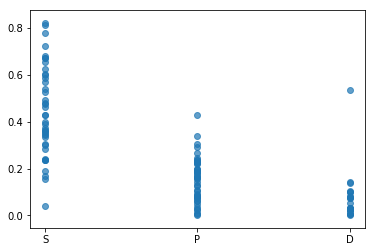

In [260]:
plt.scatter(metadata['species'],metadata['touching'],alpha=0.7)

In [329]:
positions=well_df.loc[(well_df['Date'] == 190919)&(well_df['WellNum'] == 1)]
positions = positions.append(positions.iloc[2]*0,ignore_index=True)
test_df=df_list[0]
#determine the distance between a label and the three antechamber entrance locations
test_df['ant dist1']=np.sqrt((test_df['anthead']['x']-positions.iloc[0]['X'])**2 + (test_df['anthead']['y']-positions.iloc[0]['Y'])**2)
test_df['ant dist2']=np.sqrt((test_df['anthead']['x']-positions.iloc[1]['X'])**2 + (test_df['anthead']['y']-positions.iloc[1]['Y'])**2)
test_df['ant dist3']=np.sqrt((test_df['anthead']['x']-positions.iloc[2]['X'])**2 + (test_df['anthead']['y']-positions.iloc[2]['Y'])**2)

test_df['beetle dist1']=np.sqrt((test_df['beetlehead']['x']-positions.iloc[0]['X'])**2 + (test_df['beetlehead']['y']-positions.iloc[0]['Y'])**2)
test_df['beetle dist2']=np.sqrt((test_df['beetlehead']['x']-positions.iloc[1]['X'])**2 + (test_df['beetlehead']['y']-positions.iloc[1]['Y'])**2)
test_df['beetle dist3']=np.sqrt((test_df['beetlehead']['x']-positions.iloc[2]['X'])**2 + (test_df['beetlehead']['y']-positions.iloc[2]['Y'])**2)

#determine which of the three antechamber entrances is closest to the given point
test_df['ant closest']=0*((test_df['ant dist1']<test_df['ant dist2'])&(test_df['ant dist1']<test_df['ant dist3'])) + \
                   1*((test_df['ant dist2']<test_df['ant dist1'])&(test_df['ant dist2']<test_df['ant dist3'])) + \
                   2*((test_df['ant dist3']<test_df['ant dist1'])&(test_df['ant dist3']<test_df['ant dist2']))

test_df['beetle closest']=0*((test_df['beetle dist1']<test_df['beetle dist2'])&(test_df['beetle dist1']<test_df['beetle dist3'])) + \
                   1*((test_df['beetle dist2']<test_df['beetle dist1'])&(test_df['beetle dist2']<test_df['beetle dist3'])) + \
                   2*((test_df['beetle dist3']<test_df['beetle dist1'])&(test_df['beetle dist3']<test_df['beetle dist2']))

#determine the equation of the circle circumscribing the central well of the arena using the three points marking the entrances to the antechamber
#basing this off of Zaz's comment from https://math.stackexchange.com/questions/213658/get-the-equation-of-a-circle-when-given-3-points
x=positions['X'][:3].values
y=positions['Y'][:3].values
ones=np.ones(3)
xy=(positions['X'][:3]**2 + positions['Y'][:3]**2).values

#creating the minors ofthe matrix of the system of equations
M11=np.stack((x,y,ones),axis=1)
M12=np.stack((xy,y,ones),axis=1)
M13=np.stack((xy,x,ones),axis=1)
M14=np.stack((xy,x,y),axis=1)

#calculating the center of the circle as well as the radius
x_0=1/2 * np.linalg.det(M12)/np.linalg.det(M11)
y_0=-1/2 * np.linalg.det(M13)/np.linalg.det(M11)
r=np.sqrt(x_0**2+y_0**2+(np.linalg.det(M14)/np.linalg.det(M11)))

#determine if the ant and the beetle are inside or outside of the circle
#plug in the position of the beetle into the left side of (x_0-x)**2 + (y_0-y)**2 < r**2
#and determine if the value is smaller than than the right side
test_df['ant in circle'] = np.sqrt((test_df['anthead']['x']-x_0)**2 + (test_df['anthead']['y']-y_0)**2) < r
test_df['beetle in circle'] = np.sqrt((test_df['beetlehead']['x']-x_0)**2 + (test_df['beetlehead']['y']-y_0)**2) < r

#creating columns for the location of the beetle and ant. If the beetle is in the center of the circle,
#the location coding is 3, otherwise it is 0-3 starting in the bottom right chamber working counterclockwise
test_df['ant loc'] = 3*test_df['ant in circle'] + (test_df['ant closest'] & ~test_df['ant in circle'])
test_df['beetle loc'] = 3*test_df['beetle in circle'] + (test_df['beetle closest'] & ~test_df['beetle in circle'])

In [330]:
test_df.head()

bodyparts     anthead                          antgaster              \
     coords           x           y likelihood           x           y   
0         0  427.767942  399.401206        1.0  361.601315  394.884507   
1         1  428.026720  399.485341        1.0  361.411461  395.220237   
2         2  428.056251  399.431414        1.0  361.357584  395.020876   
3         3  427.648703  399.881099        1.0  361.437400  394.975922   
4         4  427.595800  399.978169        1.0  361.298920  395.039374   

              beetlehead                         ... beetle dist1  \
  likelihood           x           y likelihood  ...                
0   0.999999  573.904745  125.137821        1.0  ...   151.489186   
1   0.999999  565.894113   85.152021        1.0  ...   188.736573   
2   1.000000  530.692755   80.947986        1.0  ...   190.066019   
3   0.999999  483.757582   58.185554        1.0  ...   218.437186   
4   1.000000  424.917760   45.482231        1.0  ...   250.080056   

  beetle dist2 beetle dist3 ant closest beetle closest ant in circle  \
                                                                       
0   473.027863   388.936099           1              0          True   
1   506.138736   398.959815           1              0          True   
2   497.411127   370.564569           1              0          True   
3   506.227119   345.310212           1              0          True   
4   508.711948   311.036770           1              0          True   

  beetle in circle ant loc beetle loc actual distance  
                                                       
0            False       3          0      317.503209  
1            False       3          0      354.651829  
2            False       3          0      355.920831  
3            False       3          0      384.898093  
4            False       3          0      416.649602  

[5 rows x 29 columns]

In [331]:
#determining all of the possible distances that need to be measured
#euclidean distance between the ant and the beetle
euclidean_dist=test_df['head2head']

#distance from the beetle to the nearest antechamber entrance
beetle2beetleentrance=np.sqrt((test_df['beetlehead']['x']-positions['X'].iloc[test_df['beetle closest']].values)**2 + \
                              (test_df['beetlehead']['y']-positions['Y'].iloc[test_df['beetle closest']].values)**2)

#distance from the beetle to the antechamber entrance nearest the ant
beetle2antentrance=np.sqrt((test_df['beetlehead']['x']-positions['X'].iloc[test_df['ant closest']].values)**2 + \
                           (test_df['beetlehead']['y']-positions['Y'].iloc[test_df['ant closest']].values)**2)

#distance from the ant to the nearest antechamber entrance
ant2antentrance=np.sqrt((test_df['anthead']['x']-positions['X'].iloc[test_df['ant closest']].values)**2 + \
                        (test_df['anthead']['y']-positions['Y'].iloc[test_df['ant closest']].values)**2)
                              
#distance from the ant to the antechamber entrance nearest the beetle
ant2beetleentrance=np.sqrt((test_df['anthead']['x']-positions['X'].iloc[test_df['beetle closest']].values)**2 + \
                           (test_df['anthead']['y']-positions['Y'].iloc[test_df['beetle closest']].values)**2)

#distance between the two antechamber entrances
entrance2entrance=np.sqrt((positions['X'].iloc[test_df['ant closest']].values-positions['X'].iloc[test_df['beetle closest']].values)**2 + \
                          (positions['Y'].iloc[test_df['ant closest']].values-positions['Y'].iloc[test_df['beetle closest']].values)**2)

In [332]:
entrance2entrance

array([325., 325., 325., ...,   0.,   0.,   0.])

In [333]:
test_df['actual distance'] = (test_df['ant loc']==test_df['beetle loc'])*euclidean_dist + \
                             (test_df['ant loc']!=test_df['beetle loc'])* \
                             ((test_df['ant loc']==3)*(ant2beetleentrance+beetle2beetleentrance) + \
                              (test_df['beetle loc']==3)*(beetle2antentrance+ant2antentrance) + \
                              ((test_df['ant loc']!=3)*(test_df['beetle loc']!=3))* \
                               (ant2antentrance+beetle2beetleentrance+entrance2entrance))

# test_df['actual distance'] = (test_df['ant loc']==test_df['beetle loc'])*euclidean_dist

# test_df['actual distance'] = test_df['actual distance'] +\
#                              ((test_df['ant loc']!=test_df['beetle loc']) * \
#                              (test_df['ant loc']==3)*(ant2beetleentrance+beetle2beetleentrance))

# test_df['actual distance'] = test_df['actual distance'] +\
#                              ((test_df['ant loc']!=test_df['beetle loc']) * \
#                              (ant2beetleentrance+beetle2beetleentrance))

# test_df['actual distance'] = test_df['actual distance'] +\
#                              (test_df['ant loc']!=test_df['beetle loc']) * \
#                              ((test_df['beetle loc']==3)*(beetle2antentrance+ant2antentrance))

# test_df['actual distance'] = test_df['actual distance'] +\
#                              (test_df['ant loc']!=test_df['beetle loc']) * \
#                              (((test_df['ant loc']!=3)&(test_df['beetle loc']!=3))* \
#                                (ant2antentrance+beetle2beetleentrance+entrance2entrance))

In [334]:
test_df['actual distance'].head()

0    317.503209
1    354.651829
2    355.920831
3    384.898093
4    416.649602
Name: actual distance, dtype: float64

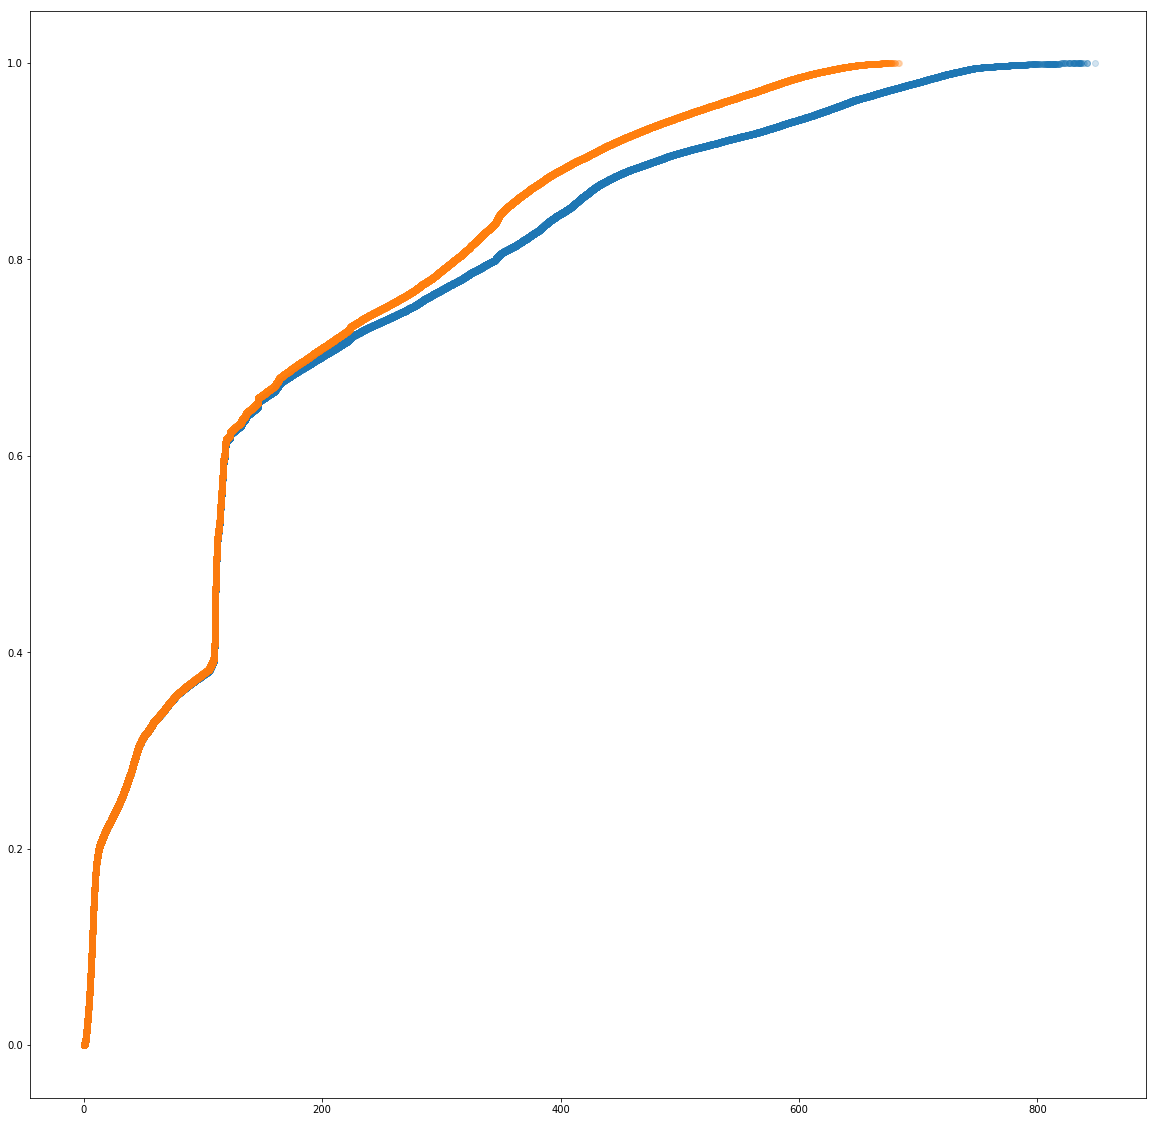

In [339]:
#colors=['Red','Orange','Green','Blue','Purple']
plt.figure(figsize=(20,20))
x_val,y_val=ecdf_func(test_df['actual distance'])

x_val1,y_val1=ecdf_func(df_list[0]['head2head'])

plt.scatter(x_val,y_val,alpha=0.2)
plt.scatter(x_val1,y_val1,alpha=0.2)

In [179]:
theta = np.linspace(0, 2*np.pi, 100)



x1 = x_0+r*np.cos(theta)
y1 = y_0+r*np.sin(theta)

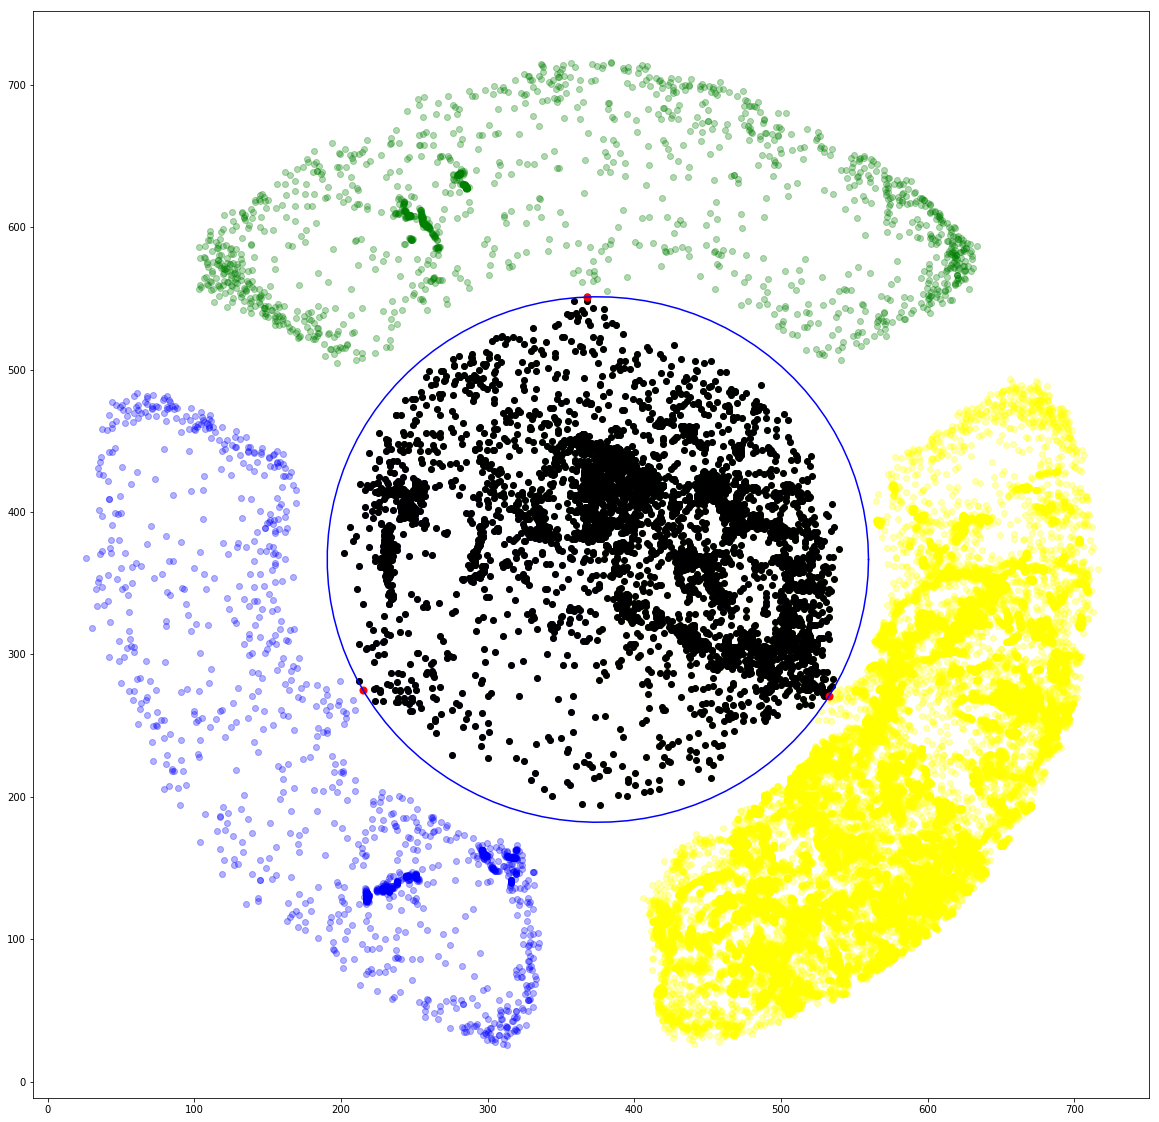

In [184]:
plt.figure(figsize=(20,20))
plt.scatter(test_df['anthead']['x'].loc[test_df['closest']==1],test_df['anthead']['y'].loc[test_df['closest']==1],alpha=0.3,color='yellow')
plt.scatter(test_df['anthead']['x'].loc[test_df['closest']==2],test_df['anthead']['y'].loc[test_df['closest']==2],alpha=0.3,color='green')
plt.scatter(test_df['anthead']['x'].loc[test_df['closest']==3],test_df['anthead']['y'].loc[test_df['closest']==3],alpha=0.3,color='blue')
plt.scatter(test_df['anthead']['x'].loc[test_df['in circle']==True],test_df['anthead']['y'].loc[test_df['in circle']==True],color='black')
plt.scatter(x_0,y_0,color='black')
plt.plot(x1,y1,color='b')
plt.scatter(well_df['X'].loc[(well_df['Date'] == 190919)&(well_df['WellNum'] == 1)],well_df['Y'].loc[(well_df['Date'] == 190919)&(well_df['WellNum'] == 1)],s=50,color='red')

In [336]:
def ecdf_func(x):
    return np.sort(x), np.arange(len(x))/len(x)

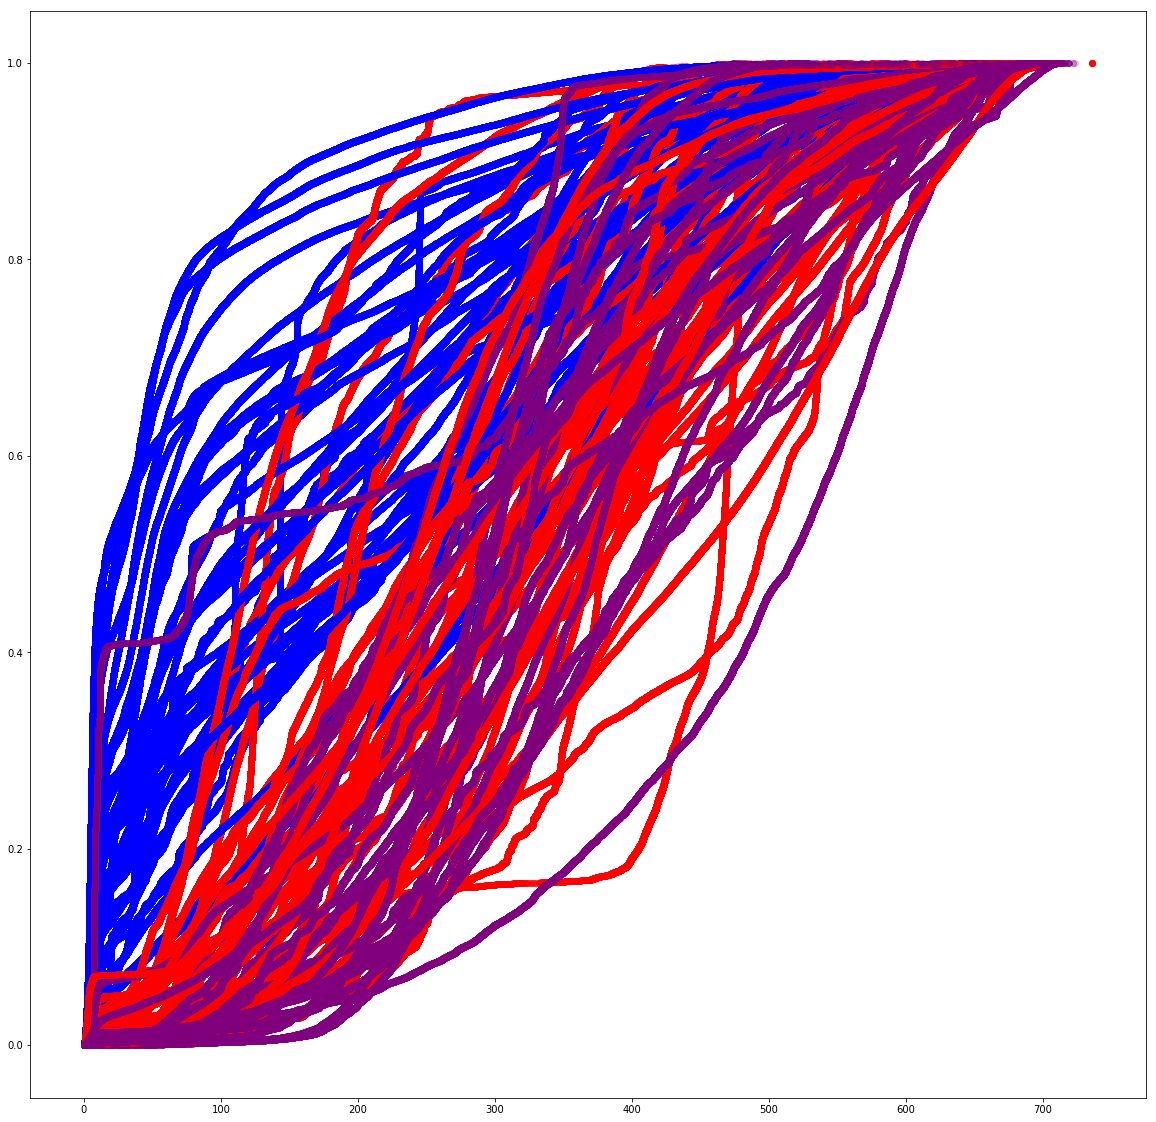

In [20]:
colors=['Red','Orange','Green','Blue','Purple']
plt.figure(figsize=(20,20))
for i,df in enumerate(df_list): 
    if metadata['species'].iloc[i] == 'P':
        color='red'
    if metadata['species'].iloc[i] == 'S':
        color='blue'
    if metadata['species'].iloc[i] == 'D':
        color='purple'
        
    x_val,y_val=ecdf_func(df['head2head'])
    
    plt.scatter(x_val,y_val,color=color,alpha=0.2)